# Análise dos dados da PNAD COVID (IBGE)

Este trabalho busca investigar os padrões contidos nos dados coletado pelo IBGE na PNAD COVID, com questionários realizados especialmente no contexto da pandemia, que buscava entender a evolução tanto de sintomas do novo coronavírus, quanto a distribuição de renda das famílias durante o período de distanciamento social.

Os dados coletados são de maio, junho, julho e agosto de 2020, e possuem granularidade semanal. Demais detalhes metodológicos podem ser acessados aqui: https://www.ibge.gov.br/estatisticas/investigacoes-experimentais/estatisticas-experimentais/27946-divulgacao-semanal-pnadcovid1?t=notas-tecnicas&utm_source=covid19&utm_medium=hotsite&utm_campaign=covid_19

### Aluno: Daniel Nascimento Rocha


In [ ]:
%%capture 
%pip install jupyterthemes
%pip install statsmodels
%pip install xlrd

In [ ]:
import palettable 
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

In [ ]:
import matplotlib.style
import matplotlib as mpl 
mpl.rcParams['grid.color'] = 'white'
mpl.rcParams['axes.titlecolor'] = 'white'
mpl.rcParams['axes.labelcolor'] = 'white'
mpl.rcParams['xtick.color'] = 'white'
mpl.rcParams['ytick.color'] = 'white'
mpl.rcParams['axes.titlesize'] = '20.0'
mpl.rcParams['figure.figsize'] = '15.0, 8.0'
mpl.rcParams['legend.framealpha'] = '0.8'

## Importando o Dicionário de Dados:

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import xlrd 
all_data = []
excel = xlrd.open_workbook('/content/drive/My Drive/Colab Notebooks/DanielNRocha/Dicionario_PNAD_COVID_052020.xls')
sheet_0 = excel.sheet_by_index(0)

Mounted at /content/drive


## Adaptando linhas mescladas para DataFrame:

In [ ]:
prev_row = [None for i in range(sheet_0.ncols)]
for row_index in range(sheet_0.nrows):
    row = []
    for col_index in range(sheet_0.ncols):
        value = sheet_0.cell(rowx=row_index,colx=col_index).value
        if type(value)==float:
            value = prev_row[col_index]
        elif len(value) == 0:
            value = prev_row[col_index]
        row.append(value)
    prev_row = row
    all_data.append(row)

col_dict = pd.DataFrame(all_data,columns=['Parte','Código da Variável','Número','Quesito','Tipo','Categoria'])
col_dict.drop(inplace=True,axis=0,index=[0,1,2,3])
col_dict.reset_index(inplace=True,drop=True)
col_dict

,Parte,Código da Variável,Número,Quesito,Tipo,Categoria
0,Parte 1 - Identificação e Controle,Ano,nº,Ano de referência,Tipo,Descrição
1,Parte 1 - Identificação e Controle,UF,nº,Unidade da Federação,Tipo,Rondônia
2,Parte 1 - Identificação e Controle,UF,nº,Unidade da Federação,Tipo,Acre
3,Parte 1 - Identificação e Controle,UF,nº,Unidade da Federação,Tipo,Amazonas
4,Parte 1 - Identificação e Controle,UF,nº,Unidade da Federação,Tipo,Roraima
...,...,...,...,...,...,...
467,Parte Suplementar 01 - Características da habi...,F0061,F61,Quem respondeu ao questionário?,Código da faixa do aluguel,Pessoa não moradora
468,Parte Suplementar 01 - Características da habi...,F0061,F61,Quem respondeu ao questionário?,Código da faixa do aluguel,Ignorado
469,Parte Suplementar 01 - Características da habi...,F006,F6,Número de ordem do morador que prestou as info...,1 a 30,Número de ordem do morador
470,Parte Suplementar 01 - Características da habi...,F006,F6,Número de ordem do morador que prestou as info...,1 a 30,Ignorado


## Importando os dados do Drive:

In [ ]:
for i in range(5,9):
    globals()['pnad_covid_0' + str(i)] = pd.read_csv('/content/drive/My Drive/Colab Notebooks/DanielNRocha/PNAD_COVID_0' + str(i) + '2020.csv')

## Limpando os dados:

In [ ]:
import itertools

for i in itertools.combinations(range(5,9), 2):
    if (globals()['pnad_covid_0' + str(i[0])].columns.to_list() == globals()['pnad_covid_0' + str(i[1])].columns.to_list()) == False:
        to_drop = list(set(globals()['pnad_covid_0' + str(i[1])].columns.to_list()) - set(globals()['pnad_covid_0' + str(i[0])].columns.to_list()))
        print(i[0],i[1],to_drop,'\n')
    else:
        print(i[0],i[1],True,'\n')
for i in range(7,9):
    globals()['pnad_covid_0' + str(i)].drop(columns=to_drop, inplace=True)
    print('Colunas sem contrapartida dropadas com sucesso!')

5 6 True 

5 7 ['A007', 'B0106', 'B009B', 'A008', 'E0024', 'F002A2', 'A009', 'B009E', 'B0102', 'A006', 'B009F', 'B0103', 'B0104', 'B0101', 'B0105', 'B009A', 'C009A', 'B009C', 'C007F', 'B011', 'B009D', 'F002A3', 'E001', 'E0022', 'E0023', 'B008', 'B00113', 'F002A1', 'F002A4', 'F002A5', 'E0021'] 

5 8 ['A007', 'B0106', 'B009B', 'A008', 'E0024', 'F002A2', 'A009', 'B009E', 'B0102', 'A006', 'B009F', 'B0103', 'B0104', 'B0101', 'B0105', 'B009A', 'C009A', 'B009C', 'C007F', 'B011', 'B009D', 'F002A3', 'E001', 'E0022', 'E0023', 'B008', 'B00113', 'F002A1', 'F002A4', 'F002A5', 'E0021'] 

6 7 ['A007', 'B0106', 'B009B', 'A008', 'E0024', 'F002A2', 'A009', 'B009E', 'B0102', 'A006', 'B009F', 'B0103', 'B0104', 'B0101', 'B0105', 'B009A', 'C009A', 'B009C', 'C007F', 'B011', 'B009D', 'F002A3', 'E001', 'E0022', 'E0023', 'B008', 'B00113', 'F002A1', 'F002A4', 'F002A5', 'E0021'] 

6 8 ['A007', 'B0106', 'B009B', 'A008', 'E0024', 'F002A2', 'A009', 'B009E', 'B0102', 'A006', 'B009F', 'B0103', 'B0104', 'B0101', 'B0105

## Concatenando e Agregando os dados:

In [ ]:
concated = pd.concat([pnad_covid_05,pnad_covid_06,pnad_covid_07,pnad_covid_08])
concated.reset_index(inplace=True,drop=True)

agregated = concated.groupby(['V1013','V1012'],as_index=False).mean() # Agregando por Mês e por Semana da pesquisa
agregated.insert(2,'V1013_12',agregated['V1013'].astype(str)+'_'+agregated['V1012'].astype(str))
agregated

,V1013,V1012,V1013_12,Ano,UF,CAPITAL,RM_RIDE,V1008,V1016,Estrato,UPA,V1022,V1023,V1030,V1031,V1032,posest,A001,A001A,A001B1,A001B2,A001B3,A002,A003,A004,A005,B0011,B0012,B0013,B0014,B0015,B0016,B0017,B0018,B0019,B00110,B00111,B00112,B002,B0031,...,C0101,C01011,C01012,C0102,C01021,C01022,C0103,C0104,C011A,C011A1,C011A11,C011A12,C011A2,C011A21,C011A22,C012,C013,C014,C015,C016,C017A,D0011,D0013,D0021,D0023,D0031,D0033,D0041,D0043,D0051,D0053,D0061,D0063,D0071,D0073,F001,F0021,F0022,F0061,F006
0,5,1,5_1,2020.0,32.140407,31.379575,31.650479,7.413052,1.0,3.252013e+06,3.215093e+08,1.219903,3.025790,833502.663293,537.582643,602.484968,3233.453251,2.297385,3.364338,19.970799,11.424952,2411.035750,36.786708,1.520452,2.541151,3.705556,1.993216,1.977077,1.988124,2.001162,1.960666,2.004239,2.005425,1.971763,1.997899,2.018314,2.015200,1.999629,1.868114,1.227566,...,1.0,4.205710,2163.907574,2.0,2.306878,869.026455,3.0,4.0,1.0,1.0,3.588442,1797.393631,2.0,1.947514,720.372928,1.166619,1.327553,1.813545,1.902581,3.745381,1.671691,1.656706,2245.869438,1.946072,601.452337,1.849386,186.917378,1.969786,1176.171370,1.581634,880.727071,1.979190,1274.246437,1.952782,1617.384454,1.832864,712.381636,2.564852,1.115321,1.631543
1,5,2,5_2,2020.0,31.956757,31.231366,31.566476,7.494887,1.0,3.233721e+06,3.196717e+08,1.227627,3.033280,837497.238812,537.894305,603.751753,3215.059363,2.315895,3.363925,19.950782,11.466474,2413.830559,36.572393,1.519565,2.566487,3.664751,1.989878,1.978601,1.989261,2.000857,1.963635,2.003656,2.004410,1.978064,1.998526,2.017583,2.014315,1.999646,1.846003,1.209390,...,1.0,4.198482,2201.948391,2.0,2.293388,897.739669,3.0,4.0,1.0,1.0,3.545701,1812.644147,2.0,1.669683,615.264706,1.157632,1.288697,1.822514,1.903521,3.741472,1.671435,1.659998,2174.529435,1.950576,576.944521,1.857247,191.181833,1.969576,1136.266992,1.550206,898.375921,1.979150,1339.364384,1.954518,1417.683999,1.838179,700.976744,2.517191,1.095237,1.631796
2,5,3,5_3,2020.0,31.700842,30.762463,31.212883,7.504234,1.0,3.207879e+06,3.171108e+08,1.233097,3.017294,825052.151811,538.358989,605.030335,3189.475571,2.305488,3.367816,19.968864,11.431685,2410.838092,36.609504,1.519886,2.575276,3.673867,1.986327,1.977702,1.986001,1.997920,1.961994,2.000697,2.001585,1.975274,1.996109,2.017418,2.010300,2.001361,1.832136,1.196231,...,1.0,4.213521,2214.091995,2.0,2.041769,919.837838,3.0,4.0,1.0,1.0,3.580076,1825.336583,2.0,1.725000,818.983333,1.156969,1.288191,1.827716,1.901638,3.771296,1.670221,1.663162,2202.430498,1.951109,598.559568,1.881990,191.726346,1.967155,1124.704896,1.527386,906.615379,1.978624,1299.636507,1.954460,1614.862222,1.834179,710.211657,2.537151,1.107879,1.633095
3,5,4,5_4,2020.0,31.755673,30.897588,31.164338,7.463436,1.0,3.213429e+06,3.176600e+08,1.228705,3.021845,825545.094384,537.382863,603.361138,3194.954592,2.309784,3.369161,20.247971,11.752279,2438.582875,36.611997,1.519636,2.578958,3.669274,1.991884,1.984400,1.991634,2.002219,1.968125,2.004221,2.005635,1.979820,2.000044,2.015763,2.010672,2.001023,1.831068,1.195332,...,1.0,4.209426,2190.393701,2.0,2.171717,828.883838,3.0,4.0,1.0,1.0,3.585579,1814.131877,2.0,1.808451,646.236620,1.152516,1.277535,1.833396,1.895430,3.823289,1.672878,1.659222,2258.870998,1.952840,607.728489,1.891103,193.753746,1.968658,1118.318292,1.503775,925.201758,1.977775,1401.885463,1.955081,1531.097602,1.846859,683.435214,2.483457,1.105002,1.642401
4,6,1,6_1,2020.0,31.815468,30.735473,31.286506,7.441394,2.0,3.219406e+06,3.182583e+08,1.230238,3.019539,820431.267077,489.718086,551.916091,3200.933864,2.306525,3.369683,20.061464,11.533872,2420.919269,36.668862,1.518952,2.558660,3.674763,2.031536,2.026678,2.031775,2.040447,2.014975,2.042979,2.042609,2.023712,2.038839,2.050401,2.048075,2.038806,1.815988,1.197645,...,1.0,4.209941,2170.852137,2.0,2.409836,890.470726,3.0,4.0,1.0,1.0,3.612051,1809.009907,2.0,2.015306,726.170918,1.156177,1.286730,1.830682,1.892637,3.801801,1.664962,1.655615,2308.202613,1.946154,618.127548,1.908989,184.794388,1.965965,1133.4

## Plotando a Renda do Trabalho:

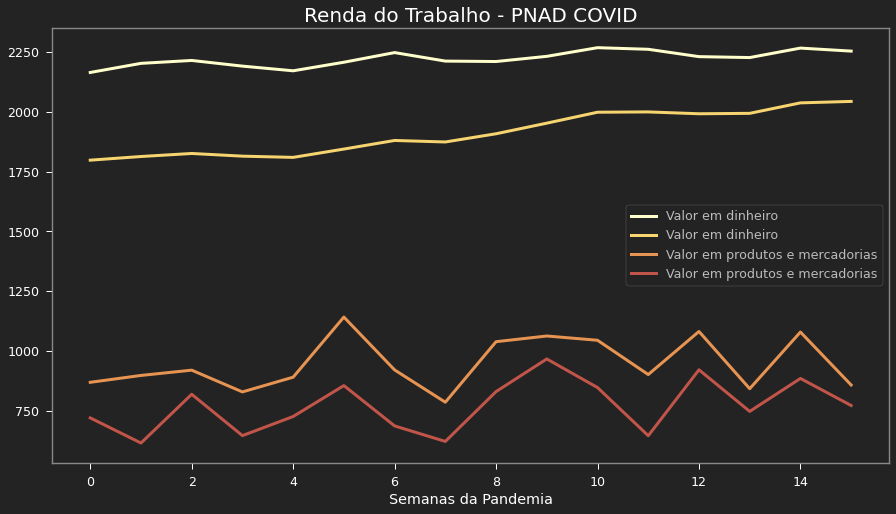

In [ ]:
colors = palettable.scientific.sequential.LaJolla_6.hex_colors
agregated[['C01012','C011A12','C01022','C011A22']].plot(color=colors,lw=3)
t=['Valor em dinheiro','Valor em dinheiro','Valor em produtos e mercadorias','Valor em produtos e mercadorias']
plt.legend(labels=t)
plt.title('Renda do Trabalho - PNAD COVID')
plt.xlabel('Semanas da Pandemia');

## Manipulando Strings para selecionar os dados:

In [ ]:
d_columns = [i for i in agregated.columns.to_list() if i[0]=='D']
print(d_columns)
d_values = list(filter(lambda n: n[-1]=='3',d_columns))
d_values

['D0011', 'D0013', 'D0021', 'D0023', 'D0031', 'D0033', 'D0041', 'D0043', 'D0051', 'D0053', 'D0061', 'D0063', 'D0071', 'D0073']


['D0013', 'D0023', 'D0033', 'D0043', 'D0053', 'D0063', 'D0073']

## Plotando os Benefícios  Sociais e Rendas Extras:

D0013: Rendimento recebido de aposentadoria e pensão por todos os moradores
D0023: Rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio
D0033: Rendimentos de Programa Bolsa Família
D0043:  No mês de ... (mês de referência), ... recebeu rendimentos de Benefício Assistencial de Prestação Continuada – BPC-LOAS?
D0053: Auxilios emergenciais relacionados ao coronavirus
D0063: Seguro desemprego
D0073: Outros rendimentos, como aluguel, arrendamento, pervidencia privada, bolsa de estudos, rendimentos de aplicação financeira etc.


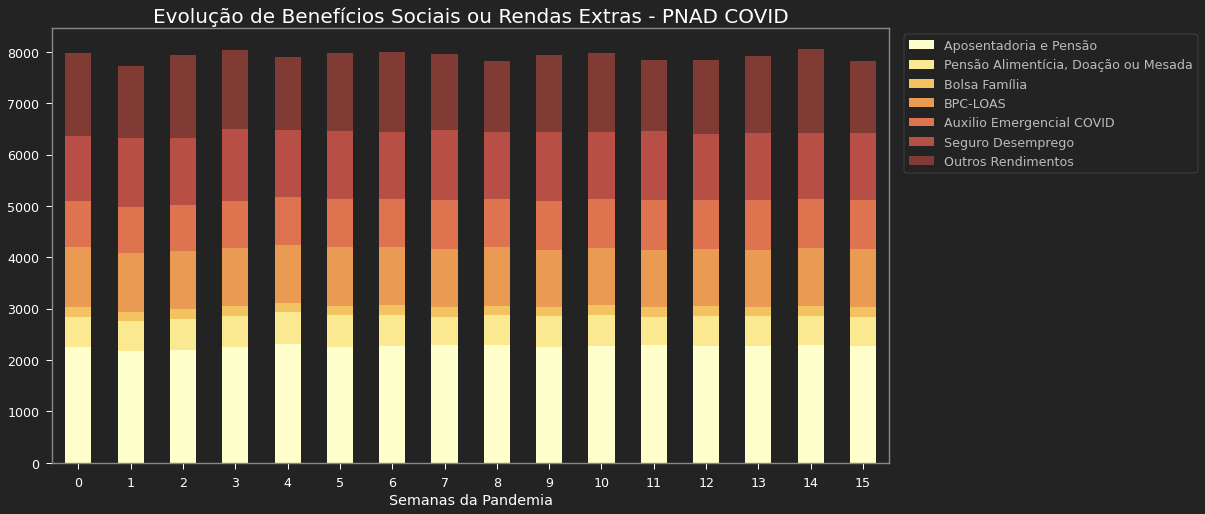

In [ ]:
colors = palettable.scientific.sequential.LaJolla_9.hex_colors 
agregated[d_values].plot(kind='bar',color=colors,stacked=True)
plt.title('Evolução de Benefícios Sociais ou Rendas Extras - PNAD COVID');
t=['Aposentadoria e Pensão','Pensão Alimentícia, Doação ou Mesada','Bolsa Família','BPC-LOAS','Auxilio Emergencial COVID','Seguro Desemprego','Outros Rendimentos']
plt.legend(labels=t,bbox_to_anchor=(1.01, 1), loc='upper left')
plt.xticks(rotation=0)
plt.xlabel('Semanas da Pandemia')
d_names = [d[:-1]+'1' for d in d_values]
for v,n in zip(d_values,d_names):
    print(v+':',col_dict[col_dict['Código da Variável']==n]['Quesito'].values[0])

## Testando a Estacionariedade:

In [ ]:
from statsmodels.tsa.stattools import adfuller

def adf_test(series,title=''):
    
    """Argumento: série temporal. Retorna o Augmented Dickey-Fuller Test"""
    
    globals()['result'] = adfuller(series.dropna(),autolag='AIC') # dropamos a linha que vira nula devido à diferenciação

    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out[f'critical value ({key})']=val
    
    if result[1] <= 0.05:
        print('\033[31m'+title)
        print('\033[31m'+'Augmented Dickey-Fuller Test:')
        print('\033[31m'+out.to_string()) # remove a linha "dtype: float64"
        print('\033[31m'+"Strong evidence against the null hypothesis")
        print('\033[31m'+"Reject the null hypothesis")
        print('\033[31m'+"Data has no unit root and is stationary")
    else:
        print('\033[32m'+title)
        print('\033[32m'+'Augmented Dickey-Fuller Test:')
        print('\033[32m'+out.to_string()) # remove a linha "dtype: float64"
        print('\033[32m'+"Weak evidence against the null hypothesis")
        print('\033[32m'+"Fail to reject the null hypothesis")
        print('\033[32m'+"Data has a unit root and is non-stationary")

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
for d in [d[:-1]+'1' for d in d_values]:
    adf_test(agregated[d],col_dict[col_dict['Código da Variável']==d]['Quesito'].values[0])
    print('\n')

Rendimento recebido de aposentadoria e pensão por todos os moradores
Augmented Dickey-Fuller Test:
ADF test statistic     -4.339462
p-value                 0.000379
# lags used             6.000000
# observations          9.000000
critical value (1%)    -4.473135
critical value (5%)    -3.289881
critical value (10%)   -2.772382
Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


Rendimento de pensão alimentícia, doação ou mesada em dinheiro de pessoa que não morava no domicílio
Augmented Dickey-Fuller Test:
ADF test statistic      -1.735316
p-value                  0.413015
# lags used              3.000000
# observations          12.000000
critical value (1%)     -4.137829
critical value (5%)     -3.154972
critical value (10%)    -2.714477
Weak evidence against the null hypothesis
Fail to reject the null hypothesis
Data has a unit root and is non-stationary


Rendimentos de Programa Bolsa Família
Augmented Dickey-Fuller Test

## Plotando o Acesso à Saúde:

1: Sim; 2: Não; 9: Ignorado


[{'B0041': 'Local que buscou atendimento foi posto de saúde/Unidade básica de saúde /Equipe de Saúde da Família (médico, enfermeiro, técnico de enfermagem ou agente comunitário de saúde)'},
 {'B0042': 'Local que buscou atendimento foi pronto socorro do SUS/UPA'},
 {'B0043': 'Local que buscou atendimento foi hospital do SUS'},
 {'B0044': 'Local que buscou atendimento foi ambulatório ou consultório privado ou ligado às forças armadas'},
 {'B0045': 'Local que buscou atendimento foi pronto socorro privado ou ligado às forças armadas'},
 {'B0046': 'Local que buscou atendimento foi hospital privado ou ligado às forças armadas'}]

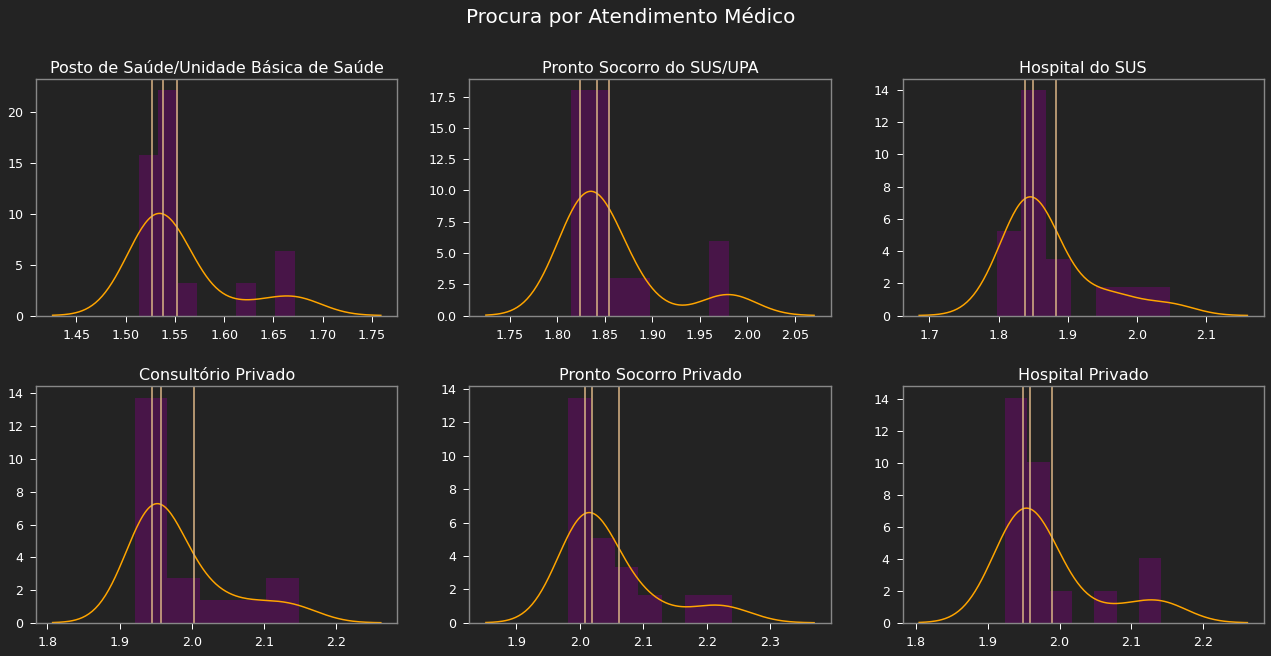

In [ ]:
b_columns = [i for i in agregated.columns.to_list() if i[0]=='B']
b_values = list(filter(lambda n: n[-2]=='4',b_columns))
t=['Posto de Saúde/Unidade Básica de Saúde','Pronto Socorro do SUS/UPA','Hospital do SUS','Consultório Privado','Pronto Socorro Privado','Hospital Privado']

import warnings
warnings.filterwarnings("ignore")

plt.figure(figsize=(22,10))
for k,t,i in zip(b_values,t,range(1,len(b_values)+1)):
    plt.subplot(2, 3, i)
    ax = sns.distplot(agregated[k],color='purple',kde_kws={"color":"orange"})
    plt.xlabel('')
    plt.title(t,size=16)
    quantile = np.quantile(agregated[k],[0.25,0.5,0.75])
    plt.axvline(x=quantile[0],color='burlywood')
    plt.axvline(x=quantile[1],color='burlywood')
    plt.axvline(x=quantile[2],color='burlywood')
    plt.ylabel('')
plt.suptitle('Procura por Atendimento Médico', fontsize=20, color='w')
plt.subplots_adjust(hspace=0.3);

print('1: Sim; 2: Não; 9: Ignorado')
[{b:col_dict[col_dict['Código da Variável']==b]['Quesito'].values[0]} for b in b_values]

## Plotando as Hospitalizações:

1: Sim; 2: Não; 9: Ignorado


[{'B005': 'Ao procurar o hospital, teve que ficar internado por um dia ou mais'},
 {'B006': 'Durante a internação, foi sedado, entubado e colocado em respiração artificial com ventilador'},
 {'B007': 'Tem algum plano de saúde médico, seja particular, de empresa ou de órgão público'}]

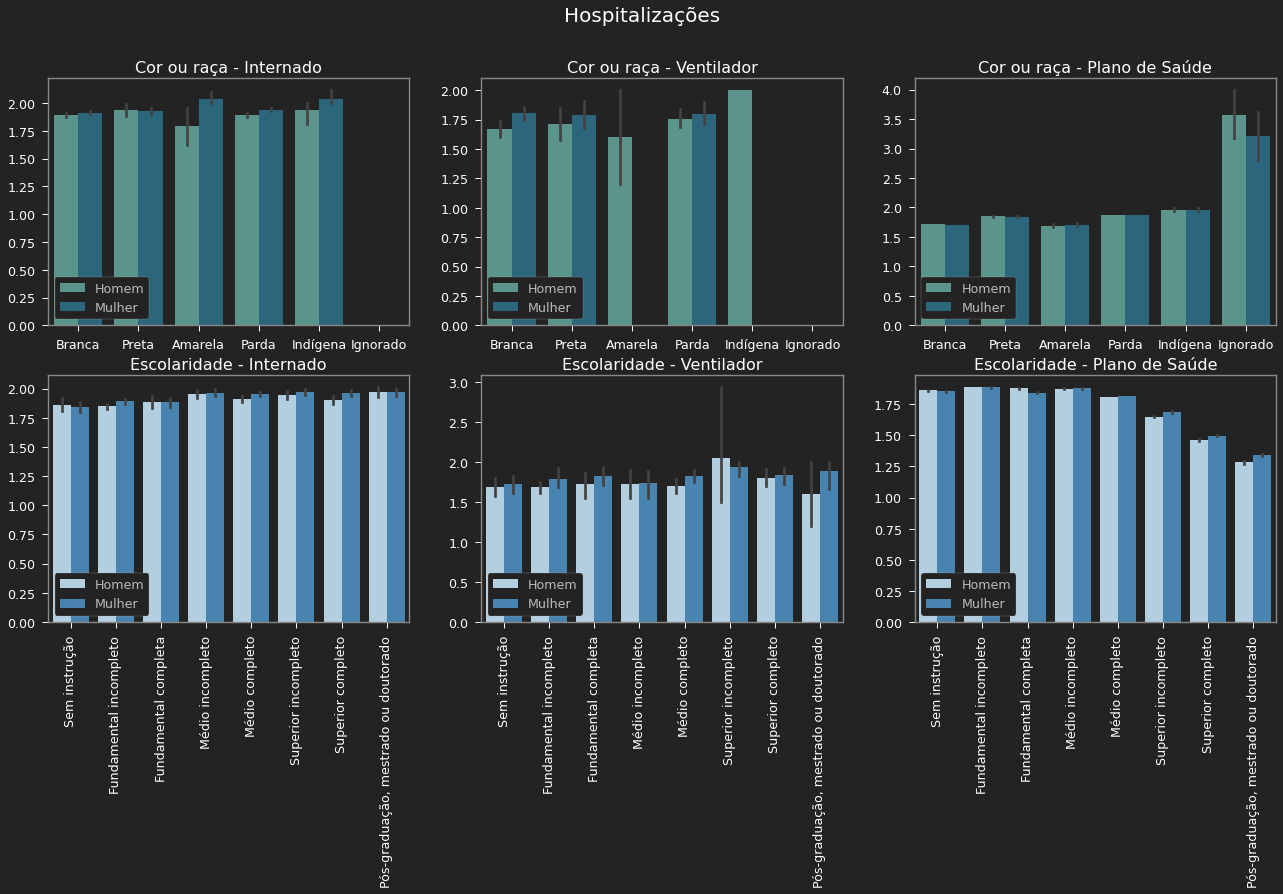

In [ ]:
b_values = list(filter(lambda n: len(n)==4,b_columns))[1:]
a_columns = [i for i in agregated.columns.to_list() if i[0]=='A']
a_values = list(filter(lambda n: len(n)==4,a_columns))[3:]

i=1
plt.figure(figsize=(22,10))
for a in ['A004','A005']:
    for b,value in {'B005':'Internado','B006':'Ventilador','B007':'Plano de Saúde'}.items():
        plt.subplot(2, 3, i)
        plt.title(col_dict[col_dict['Código da Variável']==a]['Quesito'].values[0]+' - '+value,size=16)
        if a == 'A004':
            ax = sns.barplot(data=concated,x=a,y=b,palette='crest',hue='A003')
            plt.xticks(np.arange(0,6), col_dict[col_dict['Código da Variável']==a]['Categoria'].values)
        else:
            ax = sns.barplot(data=concated,x=a,y=b,palette='Blues',hue='A003')
            plt.xticks(np.arange(0,8), col_dict[col_dict['Código da Variável']==a]['Categoria'].values,rotation=90)
        label_list, new_list = [], []
        for t in ax.get_legend_handles_labels():
            label_list.append(t)
        for txt in label_list[1]:
            if txt[0] == '0':
                txt = str(txt)[:4]
            new_list.append(txt)
        label_list[1] = new_list
        plt.legend(handles=label_list[0], labels=['Homem','Mulher'], loc='lower left', framealpha=1)
        plt.xlabel('')
        plt.ylabel('')
        i += 1
plt.suptitle('Hospitalizações', fontsize=20, color='w')
plt.subplots_adjust(hspace=0.2);

print('1: Sim; 2: Não; 9: Ignorado')
[{b:col_dict[col_dict['Código da Variável']==b]['Quesito'].values[0]} for b in b_values]

## Verificando a correlação dos dados:

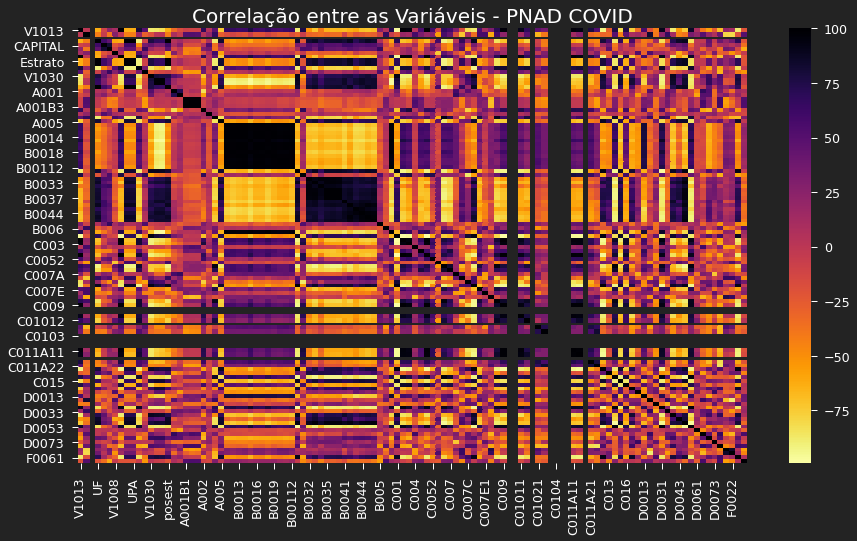

In [ ]:
sns.heatmap((agregated.corr()*100).T, cmap='inferno_r')
plt.title('Correlação entre as Variáveis - PNAD COVID');